# Lec09 - supervised learning: regularization

*   Section 1. Overfitting in a univariate regression
*   Section 2. Overfitting in a multivariate regression
*   Section 3. Regularization to address overfitting


In [1]:
# import modules
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# new module sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn import metrics

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
# read data
df = pd.read_csv('SampleDataset/Florida_ct.csv', index_col = 0)

In [3]:
df.head()

,pop_total,sex_total,sex_male,sex_female,age_median,households,race_total,race_white,race_black,race_native,...,travel_walk_ratio,travel_work_home_ratio,edu_bachelor_ratio,edu_master_ratio,edu_phd_ratio,edu_higher_edu_ratio,employment_unemployed_ratio,vehicle_per_capita,vehicle_per_household,vacancy_ratio
0,2812.0,2812.0,1383.0,1429.0,39.4,931.0,2812.0,2086.0,517.0,0.0,...,0.014815,0.024242,0.183838,0.029798,0.003030,0.216667,0.286635,0.528094,1.595059,0.155938
1,4709.0,4709.0,2272.0,2437.0,34.2,1668.0,4709.0,2382.0,1953.0,0.0,...,0.022150,0.004615,0.135222,0.040245,0.003220,0.178686,0.318327,0.460183,1.299161,0.152869
2,5005.0,5005.0,2444.0,2561.0,34.1,1379.0,5005.0,2334.0,2206.0,224.0,...,0.026141,0.027913,0.213247,0.064620,0.007431,0.285299,0.366755,0.450949,1.636693,0.162211
3,6754.0,6754.0,2934.0,3820.0,31.3,2238.0,6754.0,4052.0,1671.0,326.0,...,0.052697,0.004054,0.093379,0.082510,0.012599,0.188488,0.314452,0.474830,1.432976,0.178716
4,3021.0,3021.0,1695.0,1326.0,44.1,1364.0,3021.0,2861.0,121.0,0.0,...,0.003014,0.013059,0.219868,0.138631,0.007064,0.365563,0.218447,0.659053,1.459677,0.335930


## Section 1. Overfitting in a univariate regression

In [4]:
# assign the inputs and outputs
var_list = ['inc_median_household']

y = df['property_value_median']
X = df[var_list]

# change the data format
X = X.values
y = y.values


In [5]:
# normalize the variables
# In ML, people typically normalize variables since some algorithms are sensitive to the scale.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)

<BarContainer object of 10 artists>

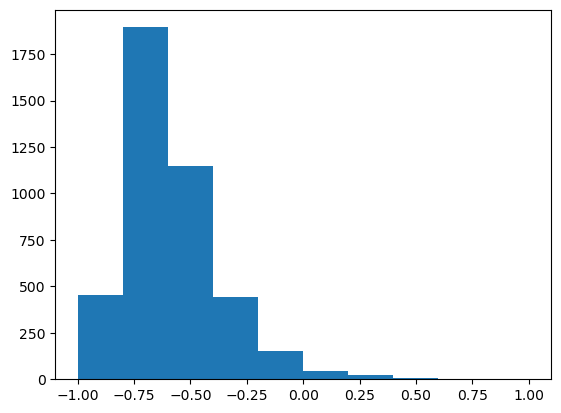

In [6]:
# visualize the normalized income.
plt.hist(X)[2]

In [7]:
# Dividing the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=9)

In [8]:
# Building and fitting the Linear Regression model
linearModel = LinearRegression()
linearModel.fit(X_train, y_train)
 
# Evaluating the Linear Regression model.
# The score here is R squared.
print("Training performance is: ", linearModel.score(X_train, y_train))

# Evaluating the Linear Regression model.
# The score here is R squared.
print("Testing performance is: ", linearModel.score(X_test, y_test))


Training performance is:  0.5541573226842144
Testing performance is:  0.5806978933861199


Please remember the similar performance in both the training and testing sets. It happens only to simple models (e.g., linear regressions). We will show very quickly how the performance of the two sets starts to differ when the input featuers have a high dimension.

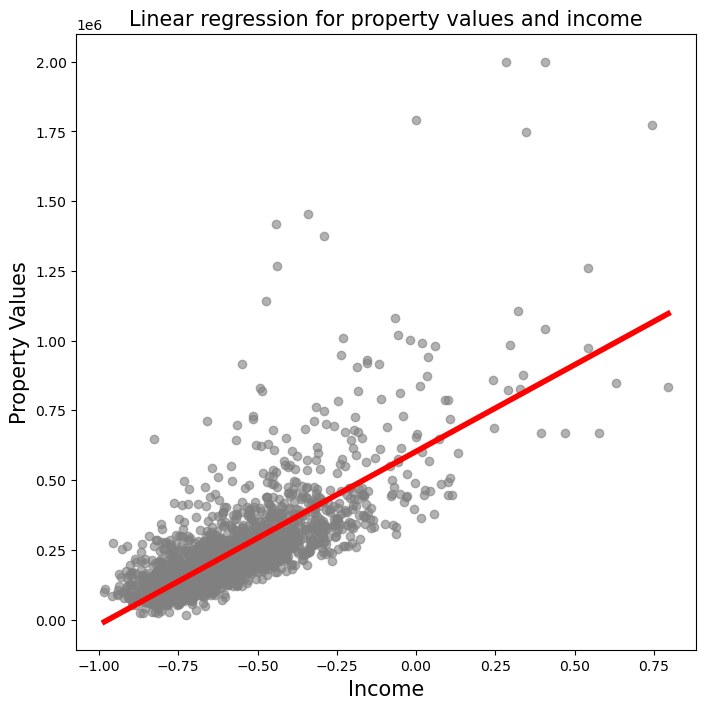

In [9]:
# visualization
# create a x_visual for visualization
x_ = np.linspace(np.min(X_train), np.max(X_train), 500)
# x_visual = np.concatenate((np.repeat(1.0, 500).reshape(-1,1), x_.reshape(-1,1)), axis=1)
x_visual = x_.reshape(-1,1)
y_visual = linearModel.predict(x_visual)

# another way to plot 
fig, ax = plt.subplots(figsize = (8, 8))
ax.scatter(X_train, y_train, color = 'grey', alpha = 0.6)
ax.plot(x_visual, y_visual, color = 'red', lw = 4)
ax.set_xlabel('Income', fontsize = 15)
ax.set_ylabel('Property Values', fontsize = 15)
ax.set_title('Linear regression for property values and income', fontsize = 15)
plt.show()

In [10]:
# Demonstrate overfitting. 
from sklearn.preprocessing import PolynomialFeatures

# polynomial transformation
poly = PolynomialFeatures(10)
X_poly = poly.fit_transform(X)

In [11]:
# check the transformed data
X_poly.shape

(4167, 11)

In [12]:
# check the transformed data
X_poly

array([[ 1.        , -0.63357141,  0.40141273, ...,  0.02596358,
        -0.01644978,  0.01042211],
       [ 1.        , -0.79633156,  0.63414395, ...,  0.16171541,
        -0.12877909,  0.10255085],
       [ 1.        , -0.7440155 ,  0.55355906, ...,  0.0938979 ,
        -0.06986149,  0.05197803],
       ...,
       [ 1.        , -0.53169146,  0.28269581, ...,  0.00638671,
        -0.00339576,  0.0018055 ],
       [ 1.        , -0.58615271,  0.343575  , ...,  0.01393433,
        -0.00816765,  0.00478749],
       [ 1.        , -0.68893065,  0.47462544, ...,  0.05074626,
        -0.03496065,  0.02408547]])

In [13]:
# Dividing the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size = 0.5, random_state=9)

In [14]:
# Building and fitting the Linear Regression with transformed features
linearModel = LinearRegression()
linearModel.fit(X_train, y_train)
 
# Evaluating the Linear Regression model.
# The score here is R squared.
print("Training performance is: ", linearModel.score(X_train, y_train))

# Evaluating the Linear Regression model.
# The score here is R squared.
print("Testing performance is: ", linearModel.score(X_test, y_test))

Training performance is:  0.5862644439490386
Testing performance is:  -99.7957820680577


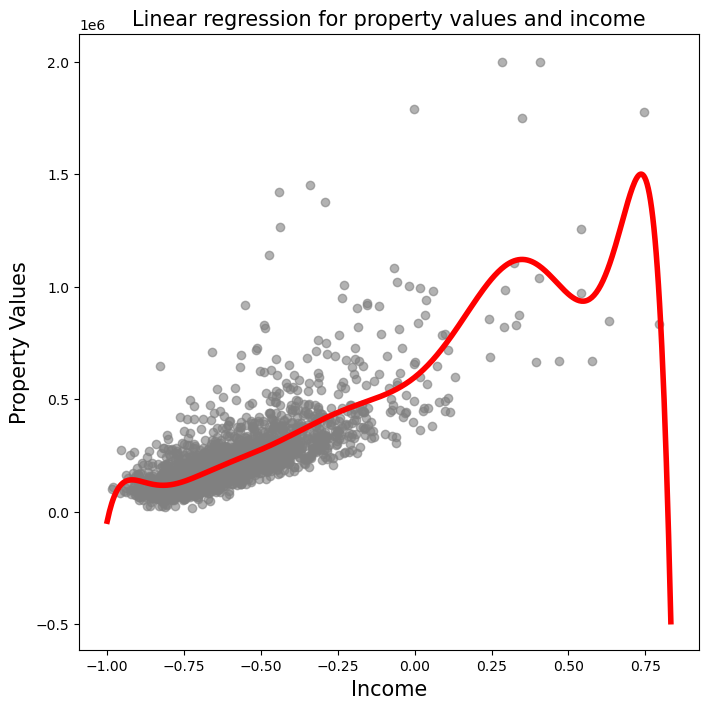

In [15]:
# visualization
# create a x_visual for visualization
x_ = np.linspace(np.min(X), np.max(X)/1.2, 500)
# x_visual = np.concatenate((np.repeat(1.0, 500).reshape(-1,1), x_.reshape(-1,1)), axis=1)
x_visual = x_.reshape(-1,1)
x_visual = poly.fit_transform(x_visual)
y_visual = linearModel.predict(x_visual)

# another way to plot 
fig, ax = plt.subplots(figsize = (8, 8))
ax.scatter(X_train[:, 1], y_train, color = 'grey', alpha = 0.6)
ax.plot(x_visual[:, 1], y_visual, color = 'red', lw = 4)
ax.set_xlabel('Income', fontsize = 15)
ax.set_ylabel('Property Values', fontsize = 15)
ax.set_title('Linear regression for property values and income', fontsize = 15)
plt.show()

## Section 2. Overfitting in a multivariate regression

In [16]:
# assign the inputs and outputs
var_list = ['inc_median_household', 
            'households',
            'travel_driving_ratio', 
            'travel_pt_ratio', 
            'travel_taxi_ratio', 
            'travel_work_home_ratio',
            'edu_higher_edu_ratio',
            'household_size_avg', 
            'vacancy_ratio', 'rent_median', 
            'race_white_ratio', 
            'race_asian_ratio']

y = df['property_value_median']
X = df[var_list]

# change the data format
X = X.values
y = y.values

In [17]:
# normalize the variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)

In [18]:
X.shape

(4167, 12)

In [19]:
# Demonstrate overfitting. 
from sklearn.preprocessing import PolynomialFeatures

# polynomial transformation
# set the degree to three
poly = PolynomialFeatures(3)
X_poly = poly.fit_transform(X)

In [20]:
# check the shape
# with the third degree polynomial transformation, we can expand 12 features to 455. 
X_poly.shape

(4167, 455)

In [21]:
# Dividing the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size = 0.5, random_state=9)

In [22]:
# Building and fitting the Linear Regression with transformed features
linearModel = LinearRegression()
linearModel.fit(X_train, y_train)
 
# Evaluating the Linear Regression model.
# The score here is R squared.
print("Training performance is: ", linearModel.score(X_train, y_train))

# Evaluating the Linear Regression model.
# The score here is R squared.
print("Testing performance is: ", linearModel.score(X_test, y_test))

Training performance is:  0.8825238735343636
Testing performance is:  -1614215673.665617


In [23]:
# Comparing the performance for multiple degrees. 
for degree in np.arange(1,5):
  print()
  print("Degree of the polynomial transformation is:", degree)

  # polynomial transformation
  poly = PolynomialFeatures(degree)
  X_poly = poly.fit_transform(X)

  # Dividing the data into training and testing set
  X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size = 0.5, random_state=9)

  # Building and fitting the Linear Regression with transformed features
  linearModel = LinearRegression()
  linearModel.fit(X_train, y_train)
  
  # count the current number of features.
  print("The number of features is: ", X_poly.shape[1])

  # Evaluating the Linear Regression model in the training set.
  print("Training performance is: ", linearModel.score(X_train, y_train))

  # Evaluating the Linear Regression model in the testing set.
  print("Testing performance is: ", linearModel.score(X_test, y_test))



Degree of the polynomial transformation is: 1
The number of features is:  13
Training performance is:  0.6765237755440289
Testing performance is:  0.6776366836351199

Degree of the polynomial transformation is: 2
The number of features is:  91
Training performance is:  0.7902115295358039
Testing performance is:  -178.6004976705162

Degree of the polynomial transformation is: 3
The number of features is:  455
Training performance is:  0.8825238735343636
Testing performance is:  -1614215673.665617

Degree of the polynomial transformation is: 4
The number of features is:  1820
Training performance is:  0.9870295235484828
Testing performance is:  -9.73980695269447e+18


When we enrich the model by using higher degrees in the polynomial transformation, we could see more serious overfitting, i.e., higher training performance and worse testing performance. It indicates that the overfitted models don't have any generalizability.

## Section 3. Regularization to address overfitting

In [24]:
# assign the inputs and outputs
var_list = ['inc_median_household', 
            'households',
            'travel_driving_ratio', 
            'travel_pt_ratio', 
            'travel_taxi_ratio', 
            'travel_work_home_ratio',
            'edu_higher_edu_ratio',
            'household_size_avg', 
            'vacancy_ratio', 'rent_median', 
            'race_white_ratio', 
            'race_asian_ratio']

y = df['property_value_median']
X = df[var_list]

# change the data format
X = X.values
y = y.values

In [25]:
# normalize the variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)

In [26]:
X.shape

(4167, 12)

In [27]:
# Demonstrate overfitting. 
from sklearn.preprocessing import PolynomialFeatures

# polynomial transformation
# set the degree to three
poly = PolynomialFeatures(3)
X_poly = poly.fit_transform(X)
X_poly.shape

(4167, 455)

In [28]:
# Dividing the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size = 0.5, random_state=9)

## Ridge regression (smaller magnitudes)

The following scripts demonstrate the process of gradually simplifying models to address overfitting.

In [29]:
# ridge regression 
# alpha is the regularization term (strength). You need to try different alpha values to identify the optimum performance.
# the following script replicate the lienar regression without regularization.
ridgeModel = Ridge(alpha = 0)
ridgeModel.fit(X_train, y_train)

# Evaluating the Linear Regression model in the training set.
print("Training performance is: ", ridgeModel.score(X_train, y_train))

# Evaluating the Linear Regression model in the testing set.
print("Testing performance is: ", ridgeModel.score(X_test, y_test))

# magnitude of the coefficients
print("The magnitude of the coefficients is: ", np.abs(np.mean(ridgeModel.coef_)))


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Training performance is:  0.8825201559461615
Testing performance is:  -1613442468.8641572
The magnitude of the coefficients is:  181188413379526.66


In [30]:
# Let's start to impose regularization
# alpha = 0.1
ridgeModel = Ridge(alpha = 0.1)
ridgeModel.fit(X_train, y_train)

# Evaluating the Linear Regression model in the training set.
print("Training performance is: ", ridgeModel.score(X_train, y_train))

# Evaluating the Linear Regression model in the testing set.
print("Testing performance is: ", ridgeModel.score(X_test, y_test))

# magnitude of the coefficients
print("The magnitude of the coefficients is: ", np.abs(np.mean(ridgeModel.coef_)))


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [31]:
# Let's start to impose regularization
# alpha = 1.0
ridgeModel = Ridge(alpha = 1.0)
ridgeModel.fit(X_train, y_train)

# Evaluating the Linear Regression model in the training set.
print("Training performance is: ", ridgeModel.score(X_train, y_train))

# Evaluating the Linear Regression model in the testing set.
print("Testing performance is: ", ridgeModel.score(X_test, y_test))

# magnitude of the coefficients
print("The magnitude of the coefficients is: ", np.abs(np.mean(ridgeModel.coef_)))


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [32]:
# Let's start to impose regularization
# alpha = 10.0
ridgeModel = Ridge(alpha = 10.0)
ridgeModel.fit(X_train, y_train)

# Evaluating the Linear Regression model in the training set.
print("Training performance is: ", ridgeModel.score(X_train, y_train))

# Evaluating the Linear Regression model in the testing set.
print("Testing performance is: ", ridgeModel.score(X_test, y_test))

# magnitude of the coefficients
print("The magnitude of the coefficients is: ", np.abs(np.mean(ridgeModel.coef_)))

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


## LASSO regression (smaller number of non-zero coefficients)

The following scripts demonstrate the process of gradually simplifying models to address overfitting.

In [33]:
# LASSO regression 
# alpha is the regularization term (strength). You need to try different alpha values to identify the optimum performance.
# the following script replicate the linear regression without regularization.
lassoModel = Lasso(alpha = 0.0)
lassoModel.fit(X_train, y_train)

# Evaluating the Linear Regression model in the training set.
print("Training performance is: ", lassoModel.score(X_train, y_train))

# Evaluating the Linear Regression model in the testing set.
print("Testing performance is: ", lassoModel.score(X_test, y_test))

# magnitude of the coefficients
print("The number of non-zero coefficients is: ", np.sum(np.abs(lassoModel.coef_) > 1e-5))


/var/folders/jh/p1jvq4k96b78klmgl3dq5jwc0000gn/T/ipykernel_41501/223534438.py:5: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lassoModel.fit(X_train, y_train)
/Users/autumnstar/opt/anaconda3/envs/Python_Tutorials/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


Training performance is:  0.8343892251567054
Testing performance is:  0.6562909391862153
The number of non-zero coefficients is:  454


/Users/autumnstar/opt/anaconda3/envs/Python_Tutorials/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.580e+12, tolerance: 6.739e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


In [34]:
# LASSO regression 
lassoModel = Lasso(alpha = 1.0)
lassoModel.fit(X_train, y_train)

# Evaluating the Linear Regression model in the training set.
print("Training performance is: ", lassoModel.score(X_train, y_train))

# Evaluating the Linear Regression model in the testing set.
print("Testing performance is: ", lassoModel.score(X_test, y_test))

# magnitude of the coefficients
print("The number of non-zero coefficients is: ", np.sum(np.abs(lassoModel.coef_) > 1e-5))

Training performance is:  0.8339976566502247
Testing performance is:  0.6641142883674334
The number of non-zero coefficients is:  447


/Users/autumnstar/opt/anaconda3/envs/Python_Tutorials/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.300e+12, tolerance: 6.739e+09
  model = cd_fast.enet_coordinate_descent(


In [35]:
# LASSO regression 
lassoModel = Lasso(alpha = 10.0)
lassoModel.fit(X_train, y_train)

# Evaluating the Linear Regression model in the training set.
print("Training performance is: ", lassoModel.score(X_train, y_train))

# Evaluating the Linear Regression model in the testing set.
print("Testing performance is: ", lassoModel.score(X_test, y_test))

# magnitude of the coefficients
print("The number of non-zero coefficients is: ", np.sum(np.abs(lassoModel.coef_) > 1e-5))

Training performance is:  0.8251210465715604
Testing performance is:  0.6913000245549527
The number of non-zero coefficients is:  285


/Users/autumnstar/opt/anaconda3/envs/Python_Tutorials/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.099e+12, tolerance: 6.739e+09
  model = cd_fast.enet_coordinate_descent(


In [36]:
# LASSO regression 
lassoModel = Lasso(alpha = 100.0)
lassoModel.fit(X_train, y_train)

# Evaluating the Linear Regression model in the training set.
print("Training performance is: ", lassoModel.score(X_train, y_train))

# Evaluating the Linear Regression model in the testing set.
print("Testing performance is: ", lassoModel.score(X_test, y_test))

# magnitude of the coefficients
print("The number of non-zero coefficients is: ", np.sum(np.abs(lassoModel.coef_) > 1e-5))

Training performance is:  0.784483541849123
Testing performance is:  0.7512922709739711
The number of non-zero coefficients is:  77


/Users/autumnstar/opt/anaconda3/envs/Python_Tutorials/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.016e+11, tolerance: 6.739e+09
  model = cd_fast.enet_coordinate_descent(


### **Exercise.** Use the automobile usage as the output and other ten variables as the inputs. Then use the polynomial feature transformation to demonstrate the overfitting problem. Meanwhile, use Ridge or Lasso regressions to address overfitting.